In [ ]:
---
title: "캐글 Home Credit Default Risk 분석"
#author: "JustY"
#date: '날짜'
categories:
  - Study
output: 
  html_document:
    keep_md: true
marp: false
---

# 사전 준비

## Kaggle 데이터 불러오기

### Kaggle API 설치

In [ ]:
!pip install kaggle

### Kaggle Token 다운로드

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# kaggle.json을 아래 폴더로 옮긴 뒤, file을 사용할 수 있도록 권한을 부여한다. 
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
uploaded file "kaggle.json" with length 63 bytes


In [ ]:
ls -1ha ~/.kaggle/kaggle.json

/root/.kaggle/kaggle.json


### 구글 드라이브 연동

In [ ]:
from google.colab import drive # 패키지 불러오기 
from os.path import join  

# 구글 드라이브 마운트
ROOT = "/content/drive"     # 드라이브 기본 경로
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # 드라이브 기본 경로 

# 프로젝트 파일 생성 및 다운받을 경로 이동
MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/python_basic/kaggle_home-credit-default-risk/data'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/python_basic/kaggle_home-credit-default-risk/data


In [ ]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/Colab Notebooks/python_basic/kaggle_home-credit-default-risk/data


### Kaggle Competitions list 불러오기

In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        134           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        161           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        292           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2248           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      17266            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4327            True  
connectx

### Home Credit Default Risk 데이터셋 불러오기

In [ ]:
!kaggle competitions download -c home-credit-default-risk

 98% 266M/271M [00:02<00:00, 123MB/s]
100% 271M/271M [00:02<00:00, 104MB/s]
 98% 75.0M/76.3M [00:00<00:00, 81.3MB/s]
100% 76.3M/76.3M [00:00<00:00, 89.9MB/s]
100% 5.81M/5.81M [00:00<00:00, 60.2MB/s]

 71% 26.0M/36.8M [00:00<00:00, 49.6MB/s]
100% 36.8M/36.8M [00:00<00:00, 74.7MB/s]
  0% 0.00/524k [00:00<?, ?B/s]
100% 524k/524k [00:00<00:00, 34.4MB/s]
 99% 107M/109M [00:01<00:00, 95.7MB/s] 
100% 109M/109M [00:01<00:00, 90.6MB/s]
 89% 86.0M/96.7M [00:01<00:00, 71.8MB/s]
100% 96.7M/96.7M [00:01<00:00, 76.9MB/s]
  0% 0.00/36.5k [00:00<?, ?B/s]
100% 36.5k/36.5k [00:00<00:00, 4.81MB/s]
 83% 30.0M/36.1M [00:00<00:00, 37.6MB/s]
100% 36.1M/36.1M [00:00<00:00, 52.1MB/s]
 99% 56.0M/56.8M [00:01<00:00, 27.5MB/s]
100% 56.8M/56.8M [00:01<00:00, 47.0MB/s]


In [ ]:
!ls

application_test.csv.zip     HomeCredit_columns_description.csv
application_train.csv.zip    installments_payments.csv.zip
bureau_balance.csv.zip	     POS_CASH_balance.csv.zip
bureau.csv.zip		     previous_application.csv.zip
credit_card_balance.csv.zip  sample_submission.csv


- zip 파일 압축 풀기 [참고](https://medium.com/hyunjulie/%EC%BA%90%EA%B8%80%EA%B3%BC-%EA%B5%AC%EA%B8%80-colab-%EC%97%B0%EA%B2%B0%ED%95%B4%EC%A3%BC%EA%B8%B0-6a274f6de81d)

In [ ]:
!unzip application_test.csv.zip
!unzip application_train.csv.zip
!unzip bureau_balance.csv.zip
!unzip bureau.csv.zip
!unzip credit_card_balance.csv.zip
!unzip installments_payments.csv.zip
!unzip POS_CASH_balance.csv.zip
!unzip previous_application.csv.zip

Archive:  application_test.csv.zip
  inflating: application_test.csv    
Archive:  application_train.csv.zip
  inflating: application_train.csv   
Archive:  bureau_balance.csv.zip
  inflating: bureau_balance.csv      
Archive:  bureau.csv.zip
  inflating: bureau.csv              
Archive:  credit_card_balance.csv.zip
  inflating: credit_card_balance.csv  
Archive:  installments_payments.csv.zip
  inflating: installments_payments.csv  
Archive:  POS_CASH_balance.csv.zip
  inflating: POS_CASH_balance.csv    
Archive:  previous_application.csv.zip
  inflating: previous_application.csv  


In [ ]:
!ls

application_test.csv	   credit_card_balance.csv.zip
application_test.csv.zip   HomeCredit_columns_description.csv
application_train.csv	   installments_payments.csv
application_train.csv.zip  installments_payments.csv.zip
bureau_balance.csv	   POS_CASH_balance.csv
bureau_balance.csv.zip	   POS_CASH_balance.csv.zip
bureau.csv		   previous_application.csv
bureau.csv.zip		   previous_application.csv.zip
credit_card_balance.csv    sample_submission.csv


- 압축파일 삭제하기 [참고](https://shiritori.tistory.com/m/11)

In [ ]:
!rm application_test.csv.zip
!rm application_train.csv.zip
!rm bureau_balance.csv.zip
!rm bureau.csv.zip
!rm credit_card_balance.csv.zip
!rm installments_payments.csv.zip
!rm POS_CASH_balance.csv.zip
!rm previous_application.csv.zip

In [ ]:
!ls

application_test.csv	 HomeCredit_columns_description.csv
application_train.csv	 installments_payments.csv
bureau_balance.csv	 POS_CASH_balance.csv
bureau.csv		 previous_application.csv
credit_card_balance.csv  sample_submission.csv


# Introduction: Manual Feature Engineering

- **bureau.csv**: 'Home Credit'에 제출된 고객(Client)의 다른 금융기관에서의 과거의 대출 기록. (각각의 대출 기록은 각각의 열로 정리되어 있다.)
- **bureau_balance.csv**: 과거 대출들의 월별 데이터. (각 월별 데이터는 각각의 열로 정리되어 있다.)

- Manual(수동화된) Feature Engineering은 지루한 과정일 수 있다. 이것은 많은 사람들이 자동화된 Feature Engineering 기능을 활용하는 주된 이유이다.
- 대출 및 채무 불이행의 주된 원인에 대한 지식을 갖추는데는 한계가 있기 때문에, 최종 학습용 데이터프레임에서 가능한 많은 정보들을 얻는 데 주안점을 두었다.
- 이 커널은 어떤 Feature가 중요한 지를 결정하는 것에 있어서, 사람보다 모델이 고르도록 하는 접근방식을 취한다. 기본적으로 이러한 접근방식에서는 최대한 많은 Feature를 만들고, 모델은 이러한 Feature를 전부 활용한다.
- 수작업(Manual) Feature Engineering의 각 과정은 많은 양의 Pandas 코드와 약간의 인내심, 특히 데이터 처리에 있어서 많은 인내심을 필요로 한다. Feature Engineering은 여전히 전처리 작업을 필요로 한다.

In [ ]:
# 데이터 처리
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas에서 나오는 경고문 무시
import warnings
warnings.filterwarnings('ignore')

# 원본
# plt.style.use('fivethirtyeight')

# matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고,
# 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편하다.
plt.style.use('seaborn')
sns.set(font_scale = 2.1)

## 예시: 고객의 이전 대출 수량 파악

**Counts of a client's previous loans**  
먼저 고객의 과거 타 금융기관에서의 대출 수량을 간단히 파악하고자 한다. 이 과정은 이 커널에서 반복적으로 사용되는 아래의 pandas 명령어를 포함한다.
- [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html): Column값에 따라 데이터프레임을 그룹화. 이 과정에서는 `SK_ID_CURR` Column의 값에 따라 고객별로 데이터프레임을 그룹화
- [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html): 그룹화된 데이터의 평균 등을 계산. 'grouped_df.mean()'을 통해 직접 평균을 계산하거나, agg 명령어와 리스트를 활용하여 평균, 최대값, 최소값, 합계 등을 계산 (grouped_df.agg([mean, max, min, sum])).
- [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html): 집계된(aggregated) 값을 해당 고객과 매칭. SK_ID_CURR Column을 활용하여 집계된 값을 원본 트레이닝 데이터로 병합하고, 해당값이 없을 경우에는 NaN값을 입력.

또한 rename 명령어를 통해 Column을 딕셔너리(dict)를 활용하여 변경한다. 이러한 방식은 생성된 변수를 계속해서 추적하는 데 유용하다.

In [ ]:
# bureau 파일 읽기
bureau = pd.read_csv('bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


- 고객 아이디(SK_ID_CURR)를 기준으로 groupby 실행한다.
- 이전 대출 횟수를 파악하고, Column 이름을 변경한다.


In [ ]:
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index = False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.head()

,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


- 훈련용 데이터프레임과 병합(Join)한다.

In [ ]:
train = pd.read_csv('application_train.csv')
train = train.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')

- NaN 값에 0 을 대입한다.

In [ ]:
train['previous_loan_counts'] = train['previous_loan_counts'].fillna(0)
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,previous_loan_counts
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


- 맨 오른쪽 컬럼에 새롭게 만들어진 previous_loan_counts 컬럼을 확일할 수 있다.

## R Value 를 활용한 변수 유용성 평가

**Assessing Usefulness of New Variable with r value**  
- 새롭게 생성된 Column의 변수가 유용한 지 판단하기 위해서, 우선 목표값(target)과 해당 변수간의 [피어슨 상관계수](https://ko.wikipedia.org/wiki/%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98)를 계산하고자 한다.
- 두 변수 사이의 선형관계(linear relationship)는 -1(완벽하게 음의 선형관계)에서부터 +1(완벽히 양의 선형관계) 사이의 값으로 표현된다.
- R Value가 변수의 유용성을 평가하기 위한 최선을 방식은 아니지만, 머신러닝 모델을 발전시키는 데 효과가 있을 지에 대한 대략적인 정보를 줄 수는 있다.
- 목표값에 대한 r-value가 커질수록, 해당 변수가 목표값에 영향을 끼칠 가능성이 높아진다. 그러므로 목표값에 대해 가장 큰 r-value의 절대값을 가지는 변수를 찾고자 한다.
- 또한 커널밀도추정그래프를 활용하여 목표값과의 상관관계를 시각적으로 살펴볼 것이다.

### 커널밀도추정그래프

**Kernal Density Estimate Plots**  
- 커널밀도추정그래프는 단일 변수의 분포를 보여준다. 히스토그램을 부드럽게 한 것으로 생각해보면 될 것이다.
- 범주형 변수의 값 차이에 따른 분포의 차이를 보기 위해, 카테고리에 따라 색을 다르게 칠하도록 하겠다. 예를 들어, target 값이 0인지 1인지에 따라 색을 다르게 칠한 previous_loan_count의 커널밀도추정그래프를 그릴 수 있다.
- 이러한 그래프는 대출을 상환한 그룹(target == 0)과 그렇지 못한 그룹(target == 1)의 분포에 있어 차이점을 보여줄 것이다.
- 이는 변수들이 머신러닝 모델과 관련성을 가지는 지를 보여줄 수 있는 지표로 활용될 수 있다.
- 원본 소스코드에 있던 df.ix 는 더 이상 지원하지 않아서 대신 df.loc를 사용한다.

In [ ]:
# 변수의 분포에 대한 그래프 target값에 따라 색을 달리하여 작성한다.
def kde_target(var_name, df):
    '''
    Args

    input:

    var_name = str, 변수가 되는 Column
    df: DataFrame, 대상 데이터 프레임

    return: None
    '''

    # 새롭게 생성된 변수와 target간의 상관계수를 계산한다.
    corr = df['TARGET'].corr(df[var_name])

    # 대출을 상환한 그룹(0)과 그렇지 않은 그룹(1)의 중간값(media)을 계산한다.
    avg_repaid = df.loc[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.loc[df['TARGET'] == 1, var_name].median()

    plt.figure(figsize = (12, 6))

    # target값에 따라 색을 달리하여 그래프 작성
    sns.kdeplot(df.loc[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.loc[df['TARGET'] == 1, var_name], label = 'TARGET == 1')

    # 그래프 라벨링
    plt.xlabel(var_name);
    plt.ylabel('Density');
    plt.title('%s Distribution' % var_name)
    plt.legend();

    # 상관계수 출력
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    
    # 중간값 출력
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)

- Random Forest 및 Gradient Boosting Machine에 의해 가장 중요한 변수로 판명된 EXT_SOURCE_3를 활용하여 테스트하도록 하겠다.

The correlation between EXT_SOURCE_3 and the TARGET is -0.1789
Median value for loan that was not repaid = 0.3791
Median value for loan that was repaid =     0.5460


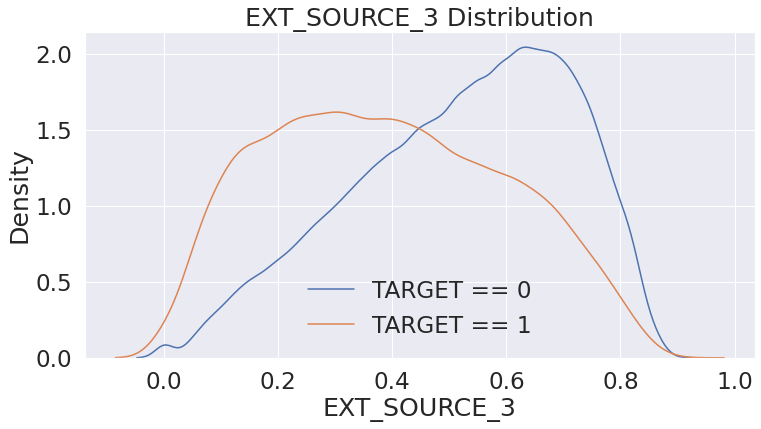

In [ ]:
kde_target('EXT_SOURCE_3', train)

- 새로운 변수 previous_loan_counts를 살펴보겠다.

The correlation between previous_loan_counts and the TARGET is -0.0100
Median value for loan that was not repaid = 3.0000
Median value for loan that was repaid =     4.0000


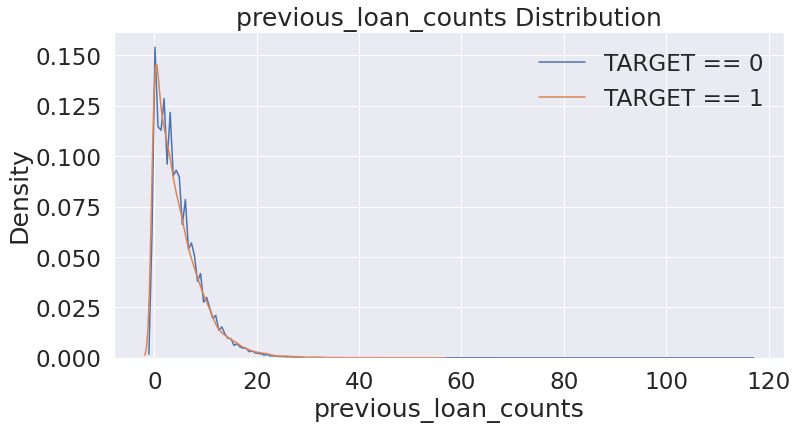

In [ ]:
kde_target('previous_loan_counts', train)

- 이 그래프를 보면 상관계수가 너무 작고, target값에 따른 분포의 차이도 거의 없는 걸 확인할 수 있다. 이를 통해, 새롭게 생성된 변수(previous_loan_counts Distribution)가 중요하지 않음을 알 수 있다.
- 이제 bureau 데이터프레임으로부터 몇 개의 변수를 새롭게 생성해보도록 하겠다. bureau 데이터프레임의 모든 수치형 변수로부터 평균, 최소, 최대값을 가져올 예정이다.

## 수치 데이터의 대표값을 계산

**Aggregating Numeric Columns**  
- 여기서 '대표값을 계산한다'는 것은 agg를 활용하여 데이터프레임의 평균, 최대값, 최소값, 합계 등을 구하는 것으로 정의한다.
- bureau 데이터 프레임 안의 수치형 변수를 활용하기 위해, 모든 수치 데이터 Column의 대표값을 계산할 것이다.
- 이를 위해 고객 ID별로 그룹화를 수행하고, 그룹화된 데이터프레임의 대표값들을 agg를 

# Putting the Functions Together

# Feature Engineering Outcomes

# Modeling

# Results